###Importing Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
sns.set()

# torch and modules
import torch
import torchvision as TV
from torchvision.io import read_image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Data Analysis and Visualisation

In [ ]:
TRAIN_SET = 5235

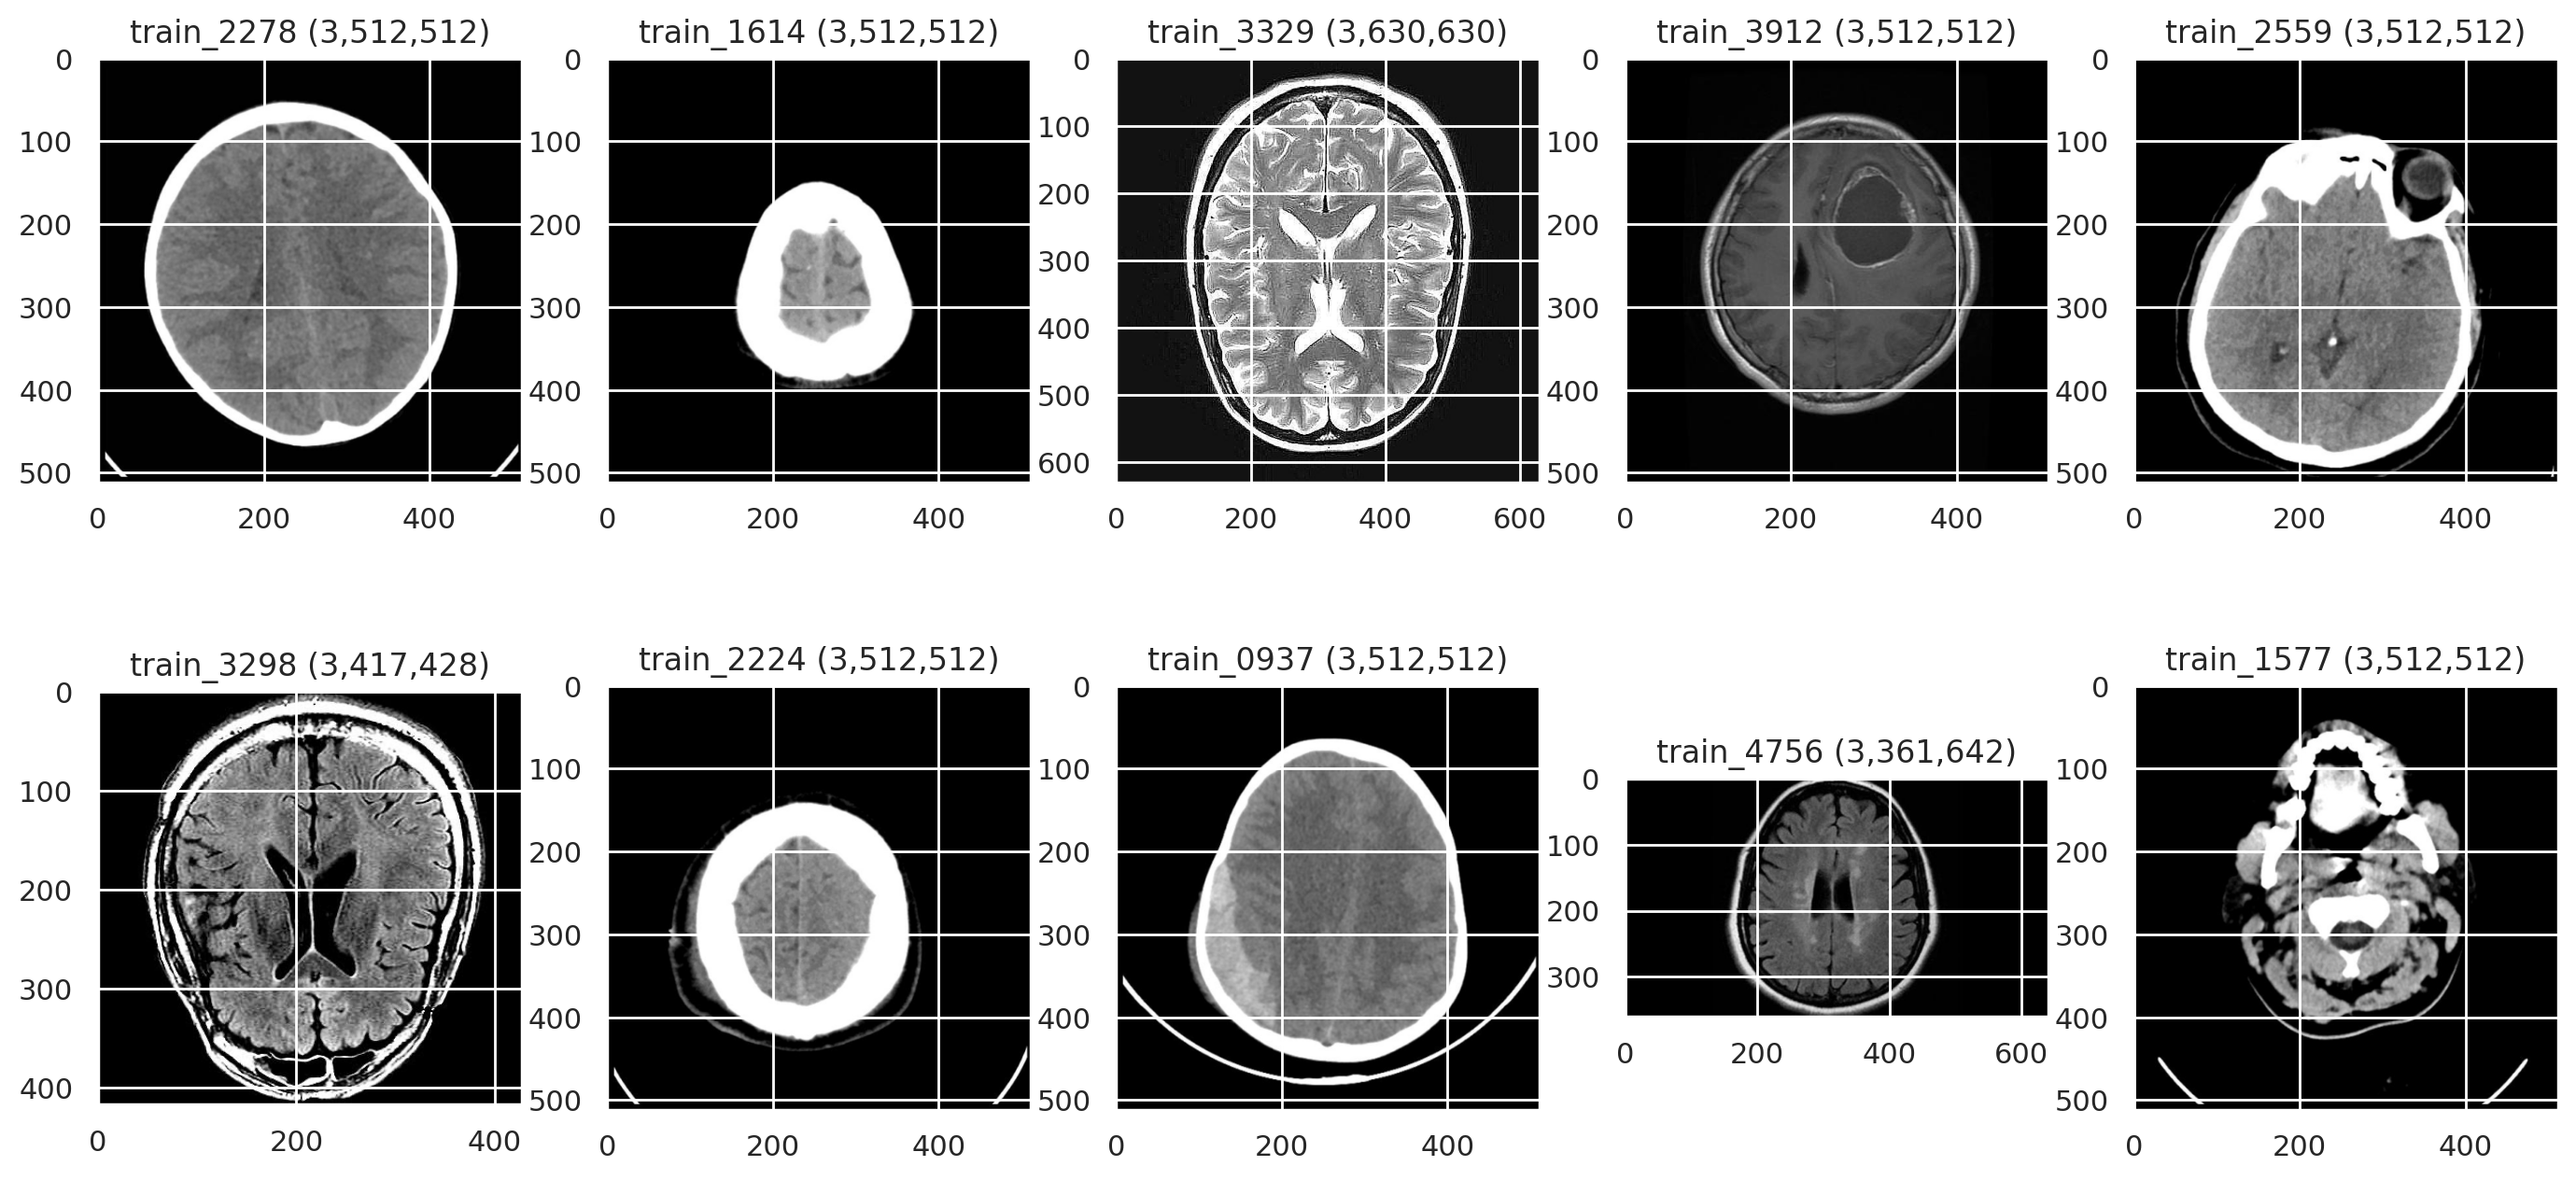

In [ ]:
# plotting 10 random images from 5235 images in the train set.
ind = np.random.randint(5235, size=10)
plt.figure(figsize = (17,8))

num=1
for i in ind:
  plt.subplot(2, 5, num)
  num+=1

  # reading a random image in the train folder
  pic = read_image(f'/content/drive/MyDrive/Restoring Brain CT and Brain MRI/data/Images/train/train_{i:04d}.png', 'RGB')
  x, y, z = pic.shape
  img = TV.transforms.ToPILImage()(pic)

  plt.title(f'train_{i:04d} ({x},{y},{z})')

  plt.imshow(img)

===> The plotted images demonstrate that the dataset has inconsistent image sizes

In [ ]:
# Finding Resolution and Size Distribution in Train Set
indexes = np.arange(0, 5235, 1)
x = []
y = []

for i in indexes:
  # reading an image from the dataset
  pic = read_image(f'/content/drive/MyDrive/Restoring Brain CT and Brain MRI/data/Images/train/train_{i:04d}.png', 'RGB')

  # getting image resolution
  a, b, c = pic.shape
  x.append(b)
  y.append(c)

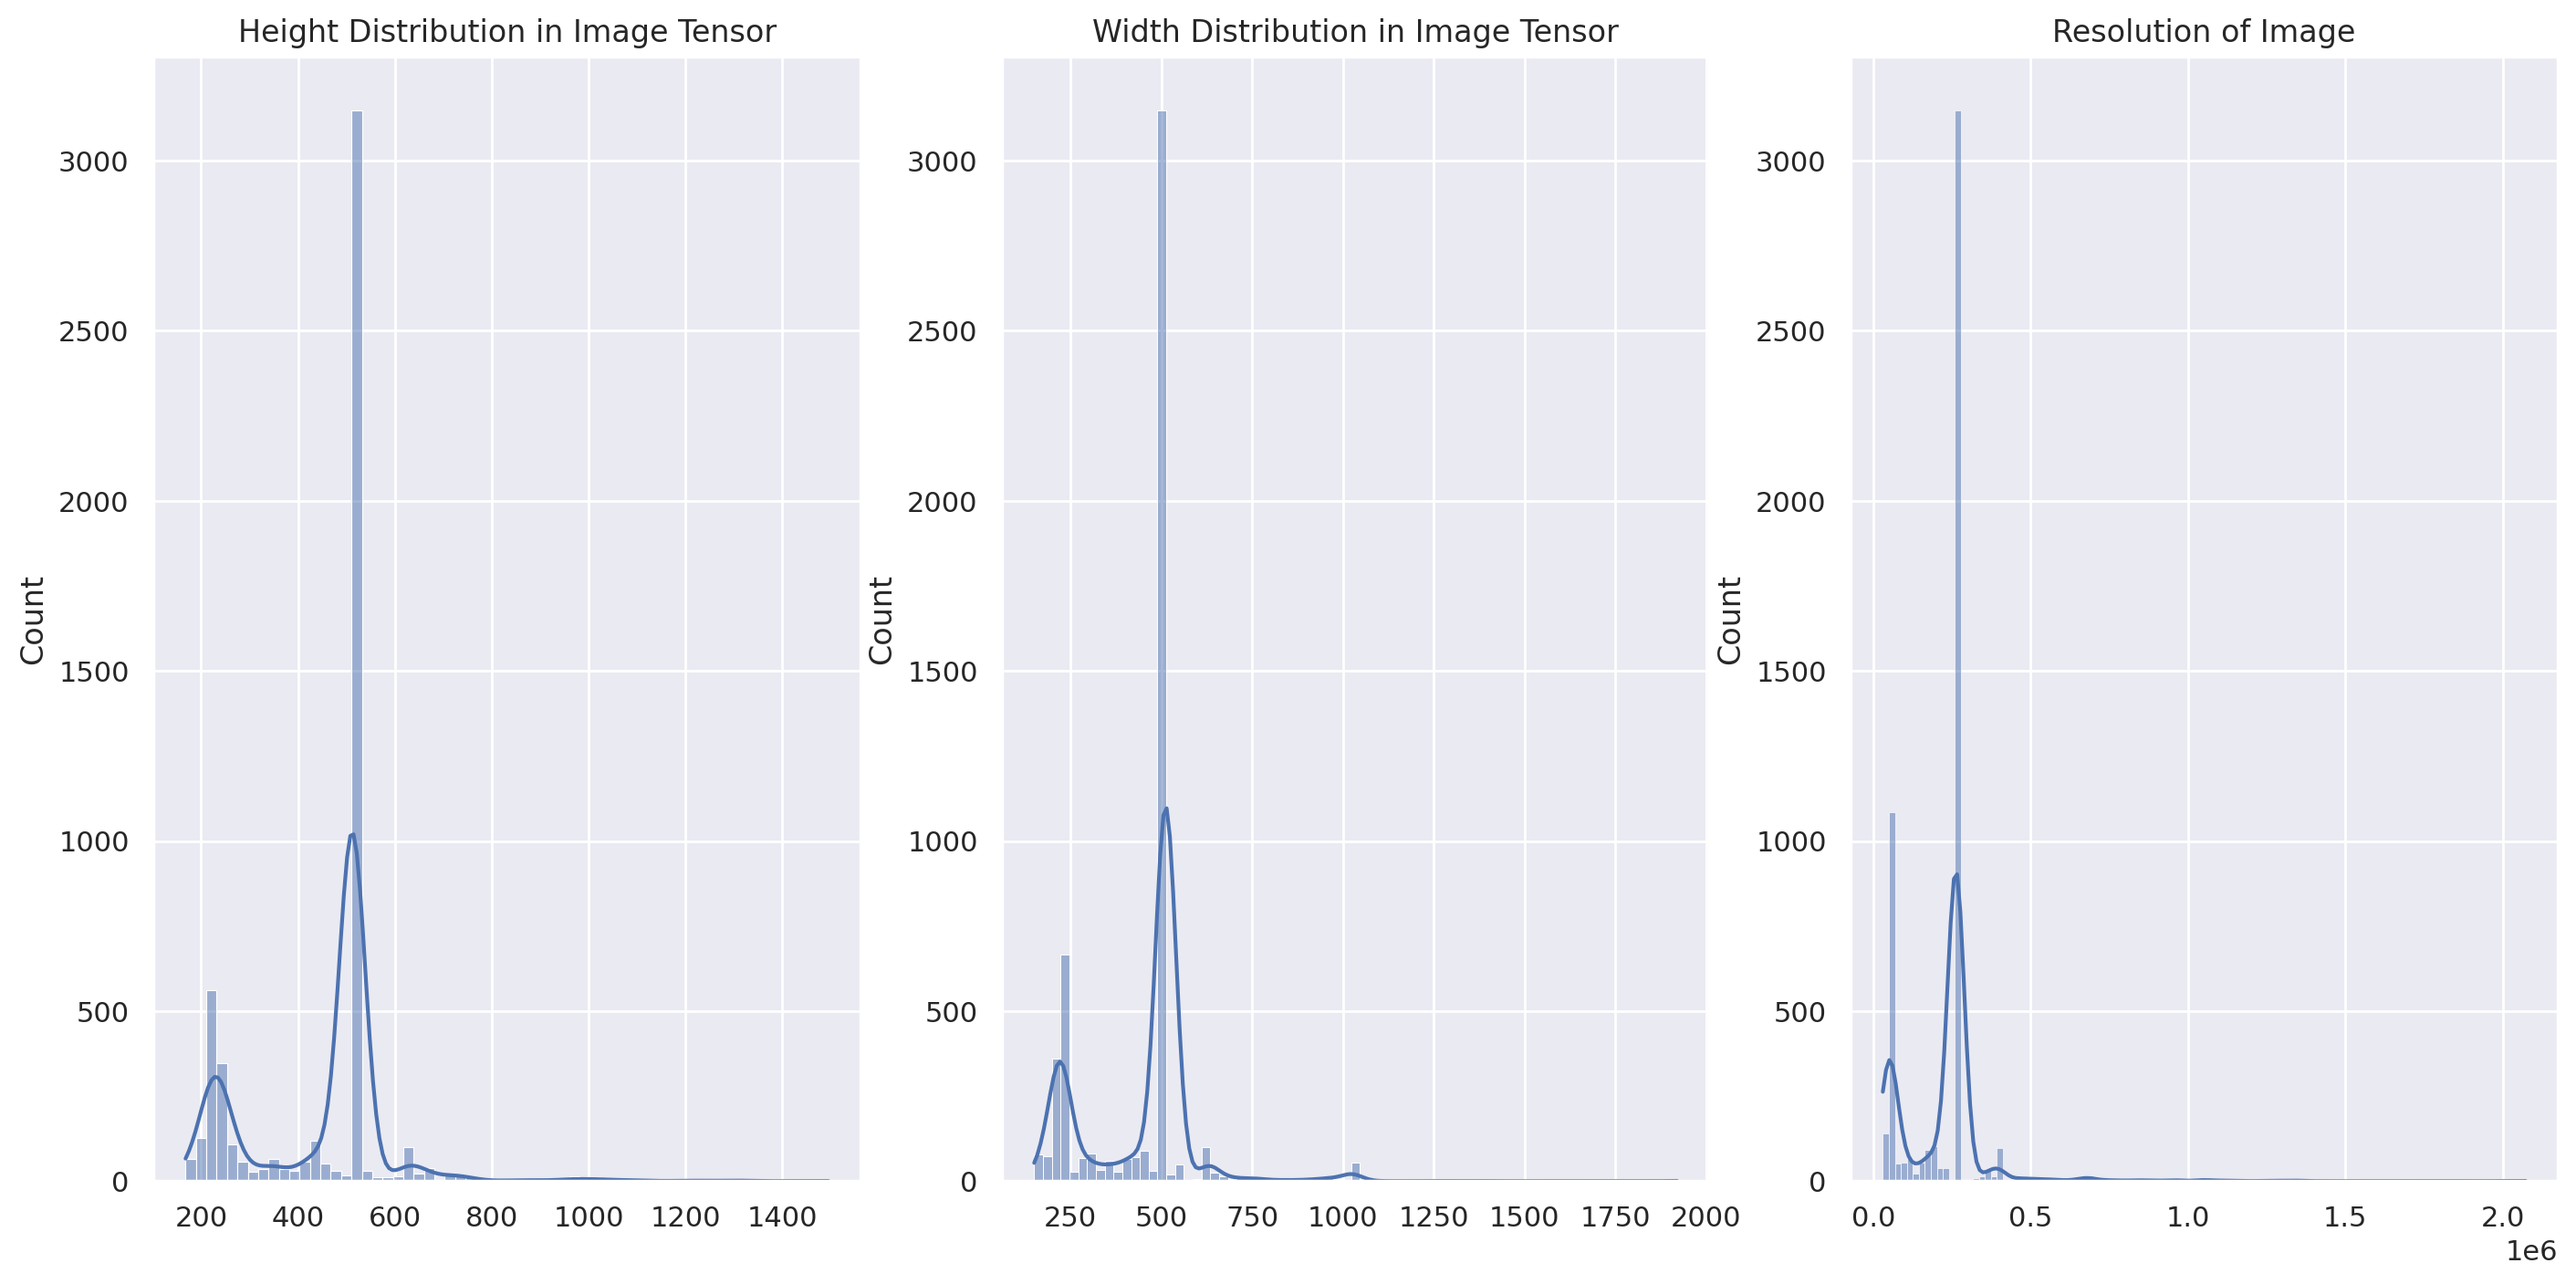

In [ ]:
plt.figure(figsize = (17,8))

# Plot 1
plt.subplot(1, 3, 1)
sns.histplot(x, kde=True)
plt.title('Height Distribution in Image Tensor')


# Plot 2
plt.subplot(1, 3, 2)
sns.histplot(y, kde=True)
plt.title('Width Distribution in Image Tensor')

# Plot 3
plt.subplot(1, 3, 3)
sns.histplot(np.multiply(x, y), kde=True)
plt.title('Resolution of Image')

plt.show()

The majority of the images are approximately 500 pixels in both width and height, providing a solid baseline for standardizing our image size.

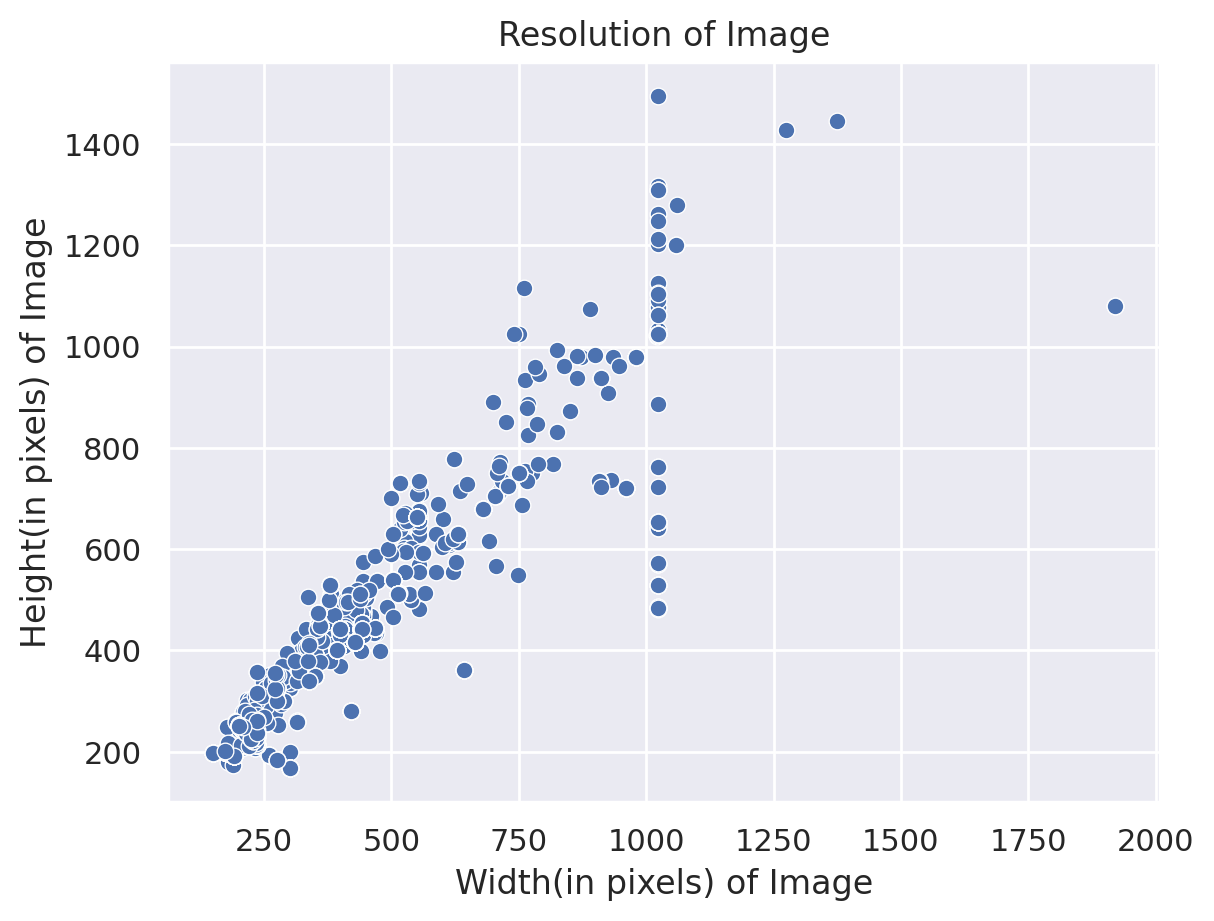

In [ ]:
sns.scatterplot(x=y, y=x)

plt.xlabel('Width(in pixels) of Image')
plt.ylabel('Height(in pixels) of Image')
plt.title('Resolution of Image')
plt.show()

===> Later in the preprocessing we can pad and crop images to same resolution to bring consistency train set.